# 10 SQL Query that provide meaningful insights 

In [2]:
# connect to mysql
import mysql.connector

conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Venu@#06",
    database="global_electronic"
)

if  conn.is_connected():
    cursor = conn.cursor()
    print("Connected to MySQL Database")


Connected to MySQL Database


# Top 5 Products by Revenue

In [4]:
query = """
    select 
	p.product_name,
    sum(s.quantity * p.unit_price_usd) as Revenue
    from sales s join product p on s.productkey = p.productkey
    group by p.product_name
    order by Revenue desc limit 5
"""

cursor.execute(query)
rows = cursor.fetchall()

for i in rows:
    print(i)

('WWI Desktop PC2.33 X2330 Black', Decimal('505450.00'))
('Adventure Works Desktop PC2.33 XD233 Silver', Decimal('466089.00'))
('Adventure Works Desktop PC2.33 XD233 Brown', Decimal('464151.00'))
('Adventure Works Desktop PC2.33 XD233 Black', Decimal('447678.00'))
('Adventure Works Desktop PC2.33 XD233 White', Decimal('437019.00'))


# Monthly Sales Trend

In [7]:
query = """
    select 
	month(s.order_date) as Month,
    sum(s.quantity * p.unit_price_usd) as Revenue
from sales s join product p on s.productkey = p.productkey
group by Month order by Month
"""

cursor.execute(query)
rows = cursor.fetchall()
rows


[(1, Decimal('6759981.20')),
 (2, Decimal('7842476.23')),
 (3, Decimal('2625522.85')),
 (4, Decimal('607334.05')),
 (5, Decimal('4757983.80')),
 (6, Decimal('4293036.54')),
 (7, Decimal('3852415.81')),
 (8, Decimal('4085169.32')),
 (9, Decimal('4363863.61')),
 (10, Decimal('4315027.44')),
 (11, Decimal('4756059.88')),
 (12, Decimal('7496608.86'))]

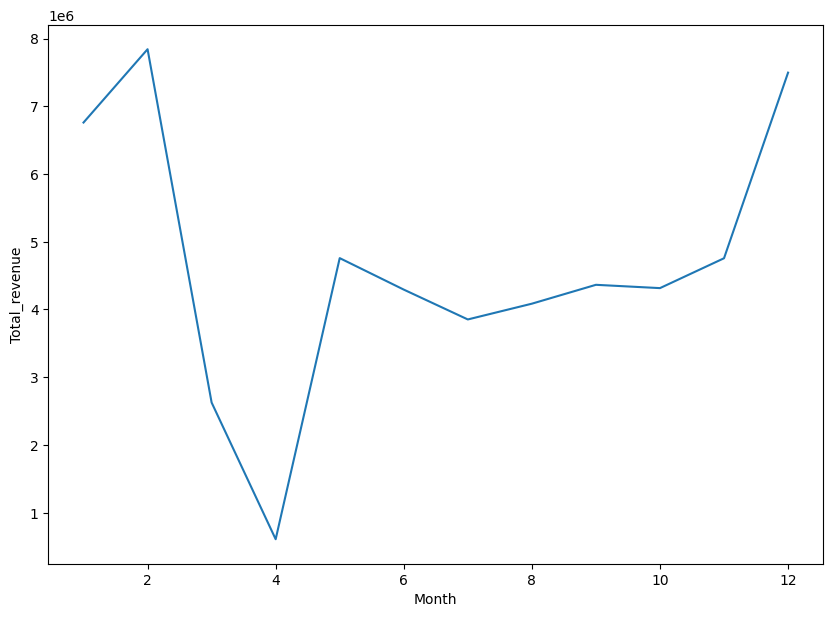

In [33]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


df = pd.DataFrame(rows, columns=['Month', 'Total_revenue'])

plt.figure(figsize=(10, 7))
sns.lineplot(x=df['Month'], y=df['Total_revenue'], markers='o')
plt.show()


# Total Sales by Store Location

In [36]:
query = """
    select 
        st.state,
        sum(s.quantity * p.unit_price_usd) as Revenue
    from sales s join store st on s.storekey = st.storekey
    join product p on p.productkey = s.productkey
    group by st.state
"""
cursor.execute(query)
rows = cursor.fetchall()
rows


[('Online', Decimal('11404324.63')),
 ('Hawaii', Decimal('1130742.94')),
 ('New Hampshire', Decimal('1207253.73')),
 ('Kansas', Decimal('1394738.06')),
 ('Oregon', Decimal('1302272.44')),
 ('Belfast', Decimal('995313.11')),
 ('Fermanagh', Decimal('383054.03')),
 ('Montana', Decimal('1193921.14')),
 ('Drenthe', Decimal('357130.15')),
 ('West Virginia', Decimal('1225040.38')),
 ('Northwest Territories', Decimal('1336150.06')),
 ('Maine', Decimal('1130592.31')),
 ('Arkansas', Decimal('1216857.73')),
 ('Nebraska', Decimal('1384396.24')),
 ('Freistaat Thüringen', Decimal('652984.86')),
 ('Blaenau Gwent', Decimal('894119.16')),
 ('Dungannon and South Tyrone', Decimal('911596.25')),
 ('Utah', Decimal('819931.04')),
 ('Sachsen-Anhalt', Decimal('657476.14')),
 ('Hamburg', Decimal('615040.59')),
 ('Alaska', Decimal('1250255.14')),
 ('New Mexico', Decimal('1325611.89')),
 ('Victoria', Decimal('859678.19')),
 ('Groningen', Decimal('434760.24')),
 ('Armagh', Decimal('837667.19')),
 ('Connecticut', 

In [47]:
import plotly.express as px

df = pd.DataFrame(rows, columns=['State', 'Total_revenue'])

fig = px.bar(x=df['State'], y=df['Total_revenue'], hover_name=df['State'])
fig.show()

# Customer Segmentation by Continent

In [49]:
query = """
    SELECT country, COUNT(DISTINCT customerkey) AS TotalCustomers
    FROM customer
    GROUP BY country
"""

cursor.execute(query)
rows = cursor.fetchall()
rows

[('Australia', 1420),
 ('Canada', 1553),
 ('France', 670),
 ('Germany', 1473),
 ('Italy', 645),
 ('Netherlands', 733),
 ('United Kingdom', 1944),
 ('United States', 6828)]

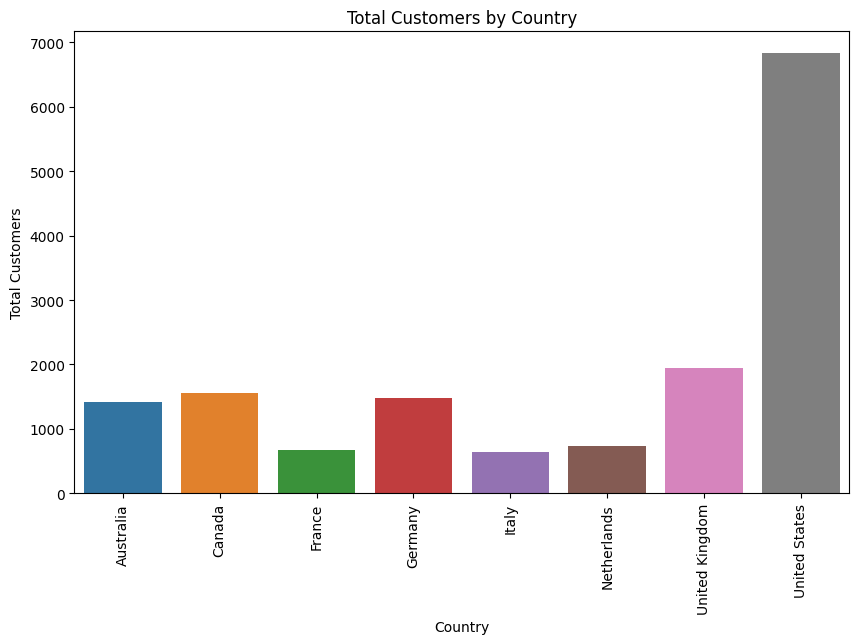

In [58]:
df = pd.DataFrame(rows, columns=['Country', 'Total_cust'])

# plot the barplot
plt.figure(figsize=(10,6))
sns.barplot(x=df['Country'], y=df['Total_cust'], hue=df['Country'])
plt.title('Total Customers by Country')
plt.xlabel('Country')
plt.ylabel('Total Customers')
plt.xticks(rotation=90)
plt.show()


# Identify Most Profitable Product Categories

In [59]:
query  = """
    select p.category , sum((p.unit_price_usd - p.unit_cost_usd) * s.quantity) as Profit
    from sales s join product p on s.productkey = p.productkey
    group by p.category
    order by Profit desc
"""

cursor.execute(query)
rows = cursor.fetchall()
rows

[('Computers', Decimal('11277447.90')),
 ('Home Appliances', Decimal('6296338.85')),
 ('Cameras and camcorders', Decimal('3919800.99')),
 ('TV and Video', Decimal('3536694.39')),
 ('Cell phones', Decimal('3498626.54')),
 ('Music, Movies and Audio Books', Decimal('1909259.17')),
 ('Audio', Decimal('1827851.77')),
 ('Games and Toys', Decimal('396668.77'))]

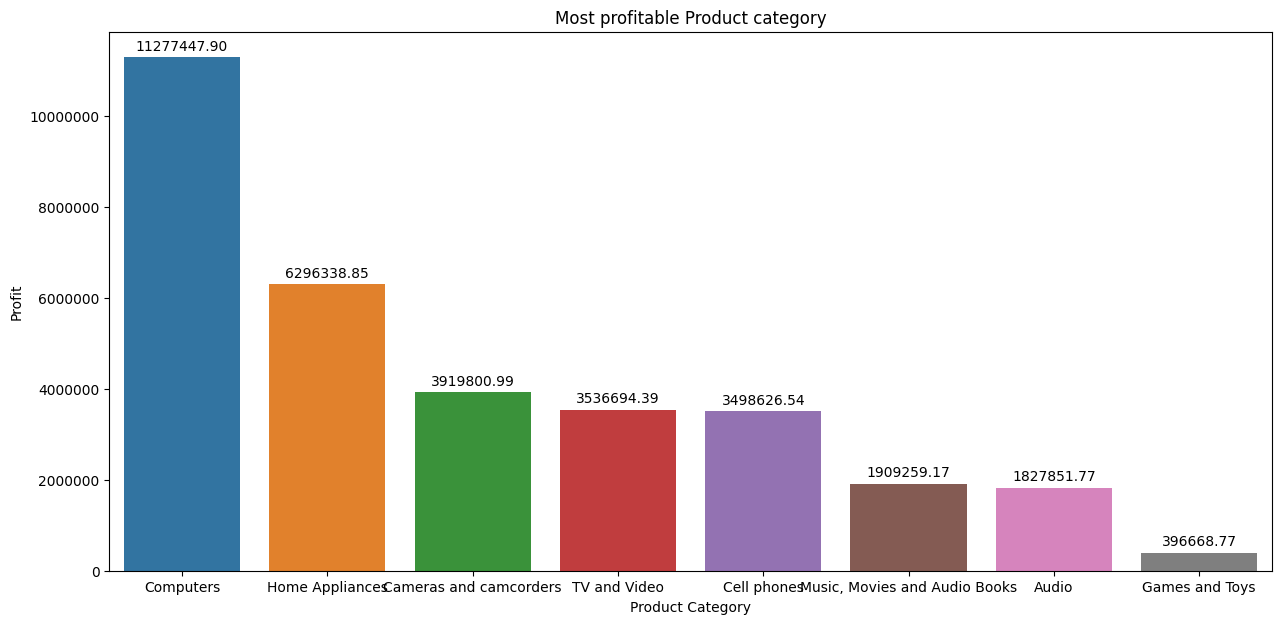

In [83]:
df = pd.DataFrame(rows, columns=['P_Category', 'Profit'])

# plot barchart
plt.figure(figsize=(15, 7))
ax = sns.barplot(x=df['P_Category'], y=df['Profit'], hue=df['P_Category'])
plt.title("Most profitable Product category")
plt.xlabel('Product Category')
plt.ylabel('Profit')
plt.gca().ticklabel_format(axis='y', style='plain')
for i in ax.containers:
    ax.bar_label(i, padding=3, fmt='%0.2f')

plt.show()

# Sales Contribution by Currency

In [84]:
query = """
    SELECT currency_code, round(sum(s.quantity * p.unit_price_usd * ex.exchange),2) AS RevenueInUSD
    FROM sales s join exchange_rate ex 
    join product p on p.productkey = s.productkey and  s.currency_code = ex.currency and s.order_date = ex.date_
    GROUP BY currency_code
"""


cursor.execute(query)
rows = cursor.fetchall()
rows

[('CAD', Decimal('6216370.33')),
 ('USD', Decimal('29871631.17')),
 ('GBP', Decimal('5449533.23')),
 ('EUR', Decimal('10032215.58')),
 ('AUD', Decimal('3779715.78'))]

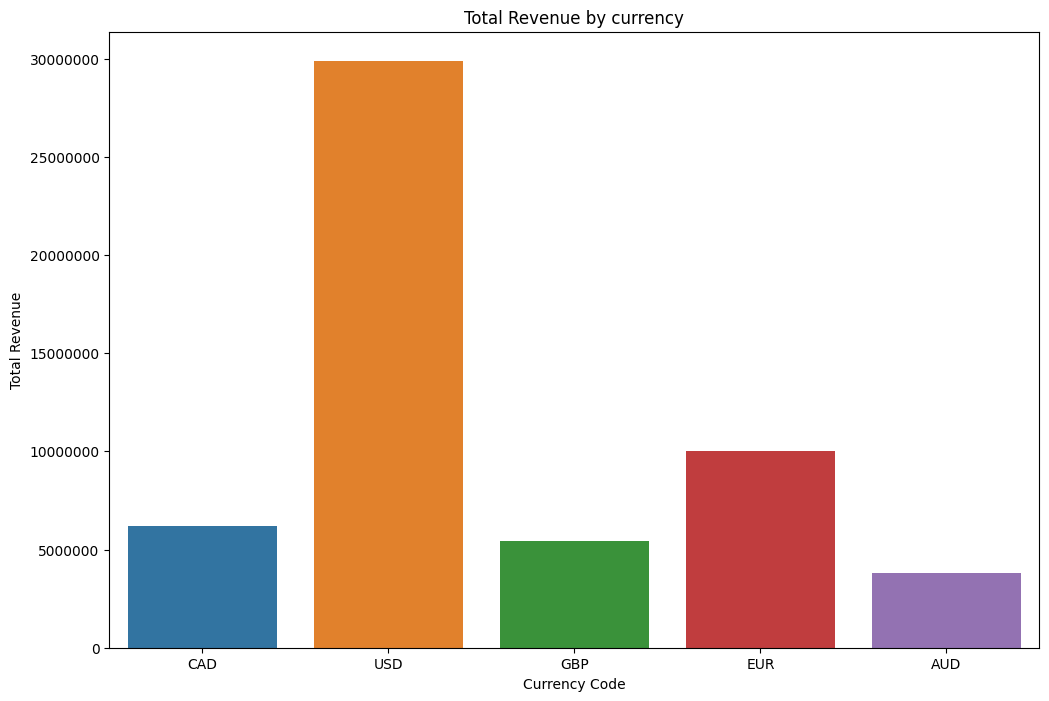

In [87]:
df = pd.DataFrame(rows, columns=['Currency_code', 'TotalUSD'])

# plot bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x=df['Currency_code'], y=df['TotalUSD'], hue=df['Currency_code'])
plt.title("Total Revenue by currency")
plt.xlabel("Currency Code")
plt.ylabel("Total Revenue")
plt.gca().ticklabel_format(axis='y', style='plain')
plt.show()



# Store Performance by Size (Revenue per Square Meter)

In [88]:
query = """
    select st.state, sum((s.quantity * p.unit_price_usd) / st.square_meters) as RevenuePerSq
    from sales s join store st  join product p  on s.storekey = st.storekey and p.productkey = s.productkey
    group by st.state
"""

cursor.execute(query)
rows = cursor.fetchall()
rows

[('Online', None),
 ('Hawaii', Decimal('1009.591973')),
 ('New Hampshire', Decimal('958.137896')),
 ('Kansas', Decimal('697.369030')),
 ('Oregon', Decimal('651.136220')),
 ('Belfast', Decimal('552.951738')),
 ('Fermanagh', Decimal('182.406668')),
 ('Montana', Decimal('947.556473')),
 ('Drenthe', Decimal('329.152205')),
 ('West Virginia', Decimal('686.297142')),
 ('Northwest Territories', Decimal('890.766705')),
 ('Maine', Decimal('873.044257')),
 ('Arkansas', Decimal('608.428865')),
 ('Nebraska', Decimal('692.198120')),
 ('Freistaat Thüringen', Decimal('326.492430')),
 ('Blaenau Gwent', Decimal('425.771023')),
 ('Dungannon and South Tyrone', Decimal('701.227884')),
 ('Utah', Decimal('409.965520')),
 ('Sachsen-Anhalt', Decimal('328.738070')),
 ('Hamburg', Decimal('450.579197')),
 ('Alaska', Decimal('1050.634580')),
 ('New Mexico', Decimal('805.843090')),
 ('Victoria', Decimal('429.839095')),
 ('Groningen', Decimal('318.505672')),
 ('Armagh', Decimal('644.359385')),
 ('Connecticut', Deci